# Numerically Solving Some Classical Models

In [55]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## Ising model 

### Defining the free energy and its derivatives 

In [250]:
def f_x(m, T):
    return m-np.tanh(m/T)

def f_xx(m,T):
    return 1-(1-(np.tanh(m/T))**2)/T 

def stability_condition2(m,T):
    return True if f_xx(m,T) > 0 else False

### Defining the equations of state and the stability condition 

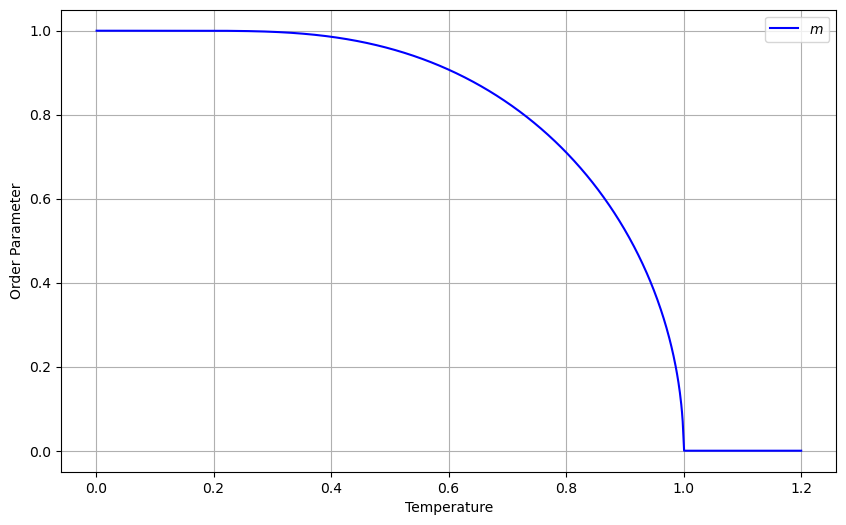

In [253]:
# Solve for a range of temperatures
T_vals = np.linspace(0.001, 1.2, 1000)
m_vals = []

for t in T_vals:
    sol = fsolve(lambda m: f_x(m,t), [10,10])  # Initial guess [0, 0]
    m_vals.append(sol[0])

m_stable=[]
T_stable=[]

for i in range(len(T_vals)): 
    if  stability_condition2(m_vals[i],T_vals[i]): 
        m_stable.append(m_vals[i])
        T_stable.append(T_vals[i])

# Plot
fig3=plt.figure(figsize=(10, 6))
plt.plot(T_stable, m_stable, label=r'$m$', color='blue')
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()


## Potts Model

In [102]:
def f_x(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_x."""
    exp1 = np.exp(m_x/T)
    exp2 = np.exp(- m_x / (2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y / (2*T))
    
    numerator = exp1 - exp2 * cosh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    
    return 3/2 * m_x - numerator / denominator

def f_y(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_y."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3) * m_y /(2*T))
    
    numerator = np.sqrt(3) * sinh_term
    denominator = exp1 + 2 * cosh_term

    return 3/2 * m_y -  numerator / denominator

def f_xx(m_x, m_y, T): #C
    """Calculate the second derivative f_xx."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator=exp1*(-3+4*T)*cosh_term + T*(2+exp2+2*cosh_term)
    denominator=exp1+2*cosh_term

    return (3/(2*T)) * (numerator / denominator**2)

def f_yy(m_x, m_y, T):
    """Calculate the second derivative f_yy."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator= 3*(-2+ T*(2+exp2) + exp1*(-1+4*T)*cosh_term+2*T*cosh_term)
    denominator=2*T*(exp1+2*cosh_term)**2

    
    return 3/2 - numerator / denominator

def f_xy(m_x, m_y, T): #C
    """Calculate the second derivative f_xy."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3)* m_y /(2*T))
    
    numerator= 3*np.sqrt(3)*exp1*sinh_term
    denominator=2*T*(exp1+2*cosh_term)**2
    
    return numerator/denominator


### Defining the equations of state and the stability condition 

Now $(m_x,m_y)$ must satisfy the following set of conditions in order to minimize $f(m_x,m_y,t)$ 
$$f_x(m_x,m_y, t)=0, \quad f_y(m_x,m_y, t)=0, $$
$$f_{xx}(m_x,m_y, t)\cdot f_{yy}(m_x,m_y, t) - (f_{xy}(m_x,m_y, t))^2 > 0, \quad \textrm{and} \quad f_{xx}(m_x,m_y, t) >0.$$

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2830939342.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2830939342.py:10: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_11579/2830939342.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]


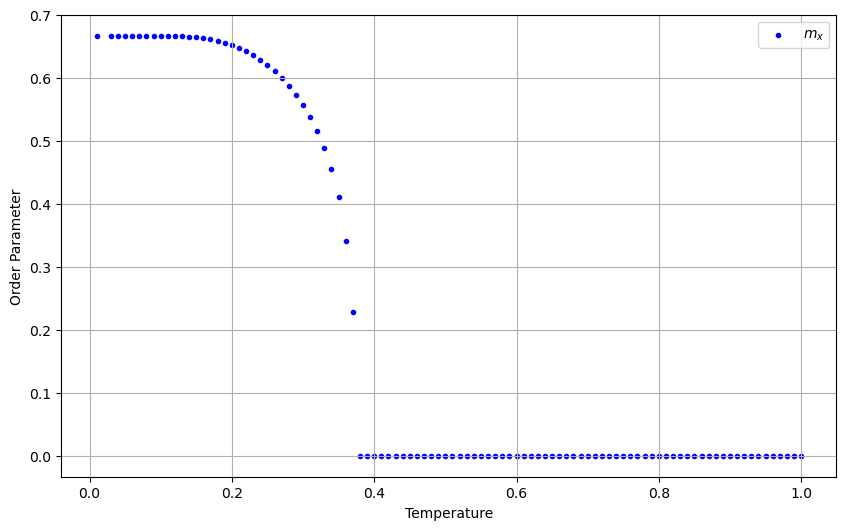

In [101]:
def stability_condition(m_x, m_y, T): 
    return True if f_xx(m_x, m_y, T)*f_yy(m_x, m_y, T) - (f_xy(m_x, m_y, T))**2>0 and f_xx(m_x, m_y, T) > 0 else False  

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1, 100)
m_x_vals = []
m_y_vals = []

for t in T_vals:
    sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [0.6, 0.3])  # Initial guess [0, 0]
    m_x_vals.append(sol[0])
    m_y_vals.append(sol[1]) 


m_x_stable=[]
m_y_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_condition(m_x_vals[i],m_y_vals[i],T_vals[i]):
        m_x_stable.append(m_x_vals[i]) 
        m_y_stable.append(m_y_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_stable, m_x_stable, label=r'$m_x$', color='blue',s=9)
#plt.scatter(T_stable, m_y_stable, label=r'$m_y$', color='red')


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()

## New Model 

### Defining the free energy and its derivatives 

$$f(Q_{\mu\nu},\beta A)=\sum_{\mu\nu}\frac{\beta A}{2}Q_{\mu\nu}^2+\ln \left[ 2\exp \left(\beta A \sum_{\mu}Q_{\mu\mu}\right)\sum_{\mu}\exp\left(\frac{-3}{2}\beta A Q_{\mu\mu}\right)\right]\approx \sum_{\mu}\frac{\beta A}{2}Q_{\mu\mu}^2+\ln \left[ 2\exp \left(\beta A \sum_{\mu}Q_{\mu\mu}\right)\sum_{\mu}\exp\left(\frac{-3}{2}\beta A Q_{\mu\mu}\right)\right]$$
$$ = \frac{\beta A}{2}\left(Q_{xx}^2+Q_{yy}^2+Q_{zz}^2 \right) + \ln \left[ 2\exp\left( \beta A (Q_{xx}+Q_{yy}+Q_{zz})\right) \left(\exp\left( \frac{-3}{2}\beta A Q_{xx}\right) + \exp\left( \frac{-3}{2}\beta A Q_{yy}\right)  + \exp\left( \frac{-3}{2}\beta A Q_{zz}\right) \right) \right]$$ 

$$f_{x}(Q_{\mu\nu},\beta A)=\beta A Q_{xx} + \frac{-3 e^{\left(-\frac{3 Q_{xx} \beta A}{2} + \beta A (Q_{xx} + Q_{yy} + Q_{zz})\right)} \beta A 
+ 2 e^{\beta A (Q_{xx} + Q_{yy} + Q_{zz})} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A}{2\exp\left( \beta A (Q_{xx}+Q_{yy}+Q_{zz})\right) \left(\exp\left( \frac{-3}{2}\beta A Q_{xx}\right) + \exp\left( \frac{-3}{2}\beta A Q_{yy}\right)  + \exp\left( \frac{-3}{2}\beta A Q_{zz}\right) \right)}$$

$$f_{y}(Q_{\mu\nu},\beta A)=\beta A Q_{yy} + \frac{-3 e^{\left(-\frac{3 Q_{yy} \beta A}{2} + \beta A (Q_{xx} + Q_{yy} + Q_{zz})\right)} \beta A 
+ 2 e^{\beta A (Q_{xx} + Q_{yy} + Q_{zz})} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A}{2\exp\left( \beta A (Q_{xx}+Q_{yy}+Q_{zz})\right) \left(\exp\left( \frac{-3}{2}\beta A Q_{xx}\right) + \exp\left( \frac{-3}{2}\beta A Q_{yy}\right)  + \exp\left( \frac{-3}{2}\beta A Q_{zz}\right) \right)}$$


$$f_{z}(Q_{\mu\nu},\beta A)=\beta A Q_{zz}+ \frac{-3 e^{\left(-\frac{3 Q_{yy} \beta A}{2} + \beta A (Q_{xx} + Q_{yy} + Q_{zz})\right)} \beta A 
+ 2 e^{\beta A (Q_{xx} + Q_{yy} + Q_{zz})} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A}{2\exp\left( \beta A (Q_{xx}+Q_{yy}+Q_{zz})\right) \left(\exp\left( \frac{-3}{2}\beta A Q_{xx}\right) + \exp\left( \frac{-3}{2}\beta A Q_{yy}\right)  + \exp\left( \frac{-3}{2}\beta A Q_{zz}\right) \right)}$$ 


$$f_{xx}(Q_{\mu\nu},\beta A)=-\frac{3}{2} e^{-\frac{3 Q_{xx} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A}
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2$$


$$f_{yy}(Q_{\mu\nu},\beta A)= -\frac{3}{2} e^{-\frac{3 Q_{yy} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A }
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2$$


$$f_{zz}(Q_{\mu\nu},\beta A)= -\frac{3}{2} e^{-\frac{3 Q_{zz} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A}
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2$$


$$f_{xy}(Q_{\mu\nu},\beta A)= - 3 e^{-\frac{3 Q_{xx} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A } \beta A^2 
- 3 e^{-\frac{3 Q_{yy} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A} \beta A^2 
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2$$ 


$$f_{xz}(Q_{\mu\nu},\beta A)= - 3 e^{-\frac{3 Q_{xx} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A} \beta A^2 
- 3 e^{-\frac{3 Q_{zz} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A} \beta A^2 
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2 $$

$$f_{yz}(Q_{\mu\nu},\beta A)=- 3 e^{-\frac{3 Q_{yy} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A} \beta A^2 
- 3 e^{-\frac{3 Q_{zz} \beta A}{2} + (Q_{xx} + Q_{yy} + Q_{zz}) \beta A} \beta A^2 
+ 2 e^{(Q_{xx} + Q_{yy} + Q_{zz}) \beta A} 
\left( e^{-\frac{3 Q_{xx} \beta A}{2}} + e^{-\frac{3 Q_{yy} \beta A}{2}} + e^{-\frac{3 Q_{zz} \beta A}{2}} \right) \beta A^2 $$





In [103]:
def f_x(Q, T):
    Q_xx, Q_yy, Q_zz = Q
    term1 = 1/T * Q_xx
    exp_common = np.exp(1/T * (Q_xx + Q_yy + Q_zz))
    
    num = (-3 * np.exp(-3 * Q_xx * 1/T / 2 + 1/T * (Q_xx + Q_yy + Q_zz)) * 1/T +
           2 * exp_common * 1/T * 
           (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    denom = (2 * exp_common *
             (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    return term1 + num / denom

def f_y(Q, T):
    Q_xx, Q_yy, Q_zz = Q
    term1 = 1/T * Q_yy
    exp_common = np.exp(1/T * (Q_xx + Q_yy + Q_zz))
    
    num = (-3 * np.exp(-3 * Q_yy * 1/T / 2 + 1/T * (Q_xx + Q_yy + Q_zz)) * 1/T +
           2 * exp_common * 1/T * 
           (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    denom = (2 * exp_common *
             (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    return term1 + num / denom

def f_z(Q, T):
    Q_xx, Q_yy, Q_zz = Q
    term1 = 1/T * Q_zz
    exp_common = np.exp(1/T * (Q_xx + Q_yy + Q_zz))
    
    num = (-3 * np.exp(-3 * Q_zz * 1/T / 2 + 1/T * (Q_xx + Q_yy + Q_zz)) * 1/T +
           2 * exp_common * 1/T * 
           (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    denom = (2 * exp_common *
             (np.exp(-3 * Q_xx * 1/T / 2) + np.exp(-3 * Q_yy * 1/T / 2) + np.exp(-3 * Q_zz * 1/T / 2)))
    
    return term1 + num / denom 


def f_xx(Q_xx, Q_yy, Q_zz, T):
    term1 = -1.5 * np.exp(-1.5 * Q_xx * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T)
    term2 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2

def f_yy(Q_xx, Q_yy, Q_zz, T):
    term1 = -1.5 * np.exp(-1.5 * Q_yy * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T)
    term2 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2

def f_zz(Q_xx, Q_yy, Q_zz, T):
    term1 = -1.5 * np.exp(-1.5 * Q_zz * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T)
    term2 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2

def f_xy(Q_xx, Q_yy, Q_zz, T):
    term1 = -3 * np.exp(-1.5 * Q_xx * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term2 = -3 * np.exp(-1.5 * Q_yy * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term3 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2 + term3

def f_xz(Q_xx, Q_yy, Q_zz, T):
    term1 = -3 * np.exp(-1.5 * Q_xx * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term2 = -3 * np.exp(-1.5 * Q_zz * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term3 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2 + term3

def f_yz(Q_xx, Q_yy, Q_zz, T):
    term1 = -3 * np.exp(-1.5 * Q_yy * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term2 = -3 * np.exp(-1.5 * Q_zz * 1/T + (Q_xx + Q_yy + Q_zz) * 1/T) * 1/T**2
    term3 = 2 * np.exp((Q_xx + Q_yy + Q_zz) * 1/T) * (
        np.exp(-1.5 * Q_xx * 1/T) + np.exp(-1.5 * Q_yy * 1/T) + np.exp(-1.5 * Q_zz * 1/T)
    ) * 1/T**2
    return term1 + term2 + term3


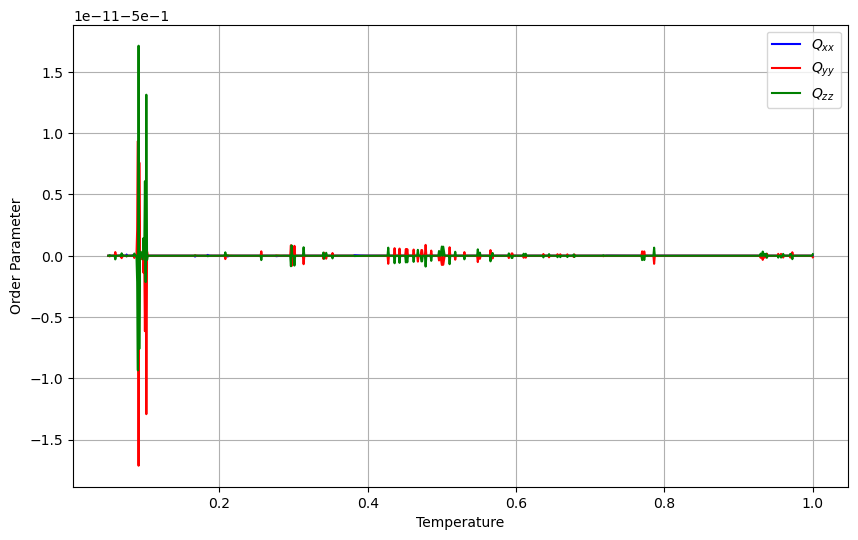

In [104]:
def stability_condition3(Q_xx, Q_yy, Q_zz, T):
    # Compute second derivatives
    fxx = f_xx(Q_xx, Q_yy, Q_zz, T)
    fyy = f_yy(Q_xx, Q_yy, Q_zz, T)
    fzz = f_zz(Q_xx, Q_yy, Q_zz, T)
    fxy = f_xy(Q_xx, Q_yy, Q_zz, T)
    fxz = f_xz(Q_xx, Q_yy, Q_zz, T)
    fyz = f_yz(Q_xx, Q_yy, Q_zz, T)
    
    # First condition
    cond1 = fxx > 0
    
    # Second condition (2x2 determinant)
    cond2 = fxx * fyy - fxy ** 2 > 0
    
    # Third condition (3x3 determinant)
    det3x3 = (fxx * (fyy * fzz - fyz ** 2) 
              - fxy * (fxy * fzz - fyz * fxz) 
              + fxz * (fxy * fyz - fyy * fxz))
    cond3 = det3x3 > 0
    
    # Return the final stability condition
    return cond1 and cond2 and cond3


# Solve for a range of temperatures
T_vals = np.linspace(0.05, 1, 1000)
Q_xx= []
Q_yy= []
Q_zz= []

for t in T_vals:
    sol = fsolve(lambda Q: [f_x(Q, t), f_y(Q, t), f_z(Q, t)], [0.6, 0.3, 0.3])  # Initial guess [0, 0]
    Q_xx.append(sol[0])
    Q_yy.append(sol[1]) 
    Q_zz.append(sol[2]) 


Q_xx_stable=[]
Q_yy_stable=[] 
Q_zz_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_condition3(Q_xx[i],Q_yy[i],Q_zz[i],T_vals[i]):
        Q_xx_stable.append(Q_xx[i]) 
        Q_yy_stable.append(Q_yy[i]) 
        Q_zz_stable.append(Q_zz[i]) 
        T_stable.append(T_vals[i]) 


# Plot
fig3=plt.figure(figsize=(10, 6))

plt.plot(T_stable, Q_xx_stable, label=r'$Q_{xx}$', color='blue')
plt.plot(T_stable, Q_yy_stable, label=r'$Q_{yy}$', color='red')
plt.plot(T_stable, Q_zz_stable, label=r'$Q_{zz}$', color='green')


#plt.plot(T_vals, Q_xx, label=r'$Q_{xx}$', color='blue')
#plt.plot(T_vals, Q_yy, label=r'$Q_{yy}$', color='red')
#plt.plot(T_vals, Q_zz, label=r'$Q_{zz}$', color='green')


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()